In [5]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the InSDN dataset (replace with actual path)
df = pd.read_csv("/content/sample_data/OVS.csv")



In [15]:
# df.head()

In [7]:
# Combine categorical features for entropy analysis
features = ["Src IP", "Dst IP", "Protocol"]
df["composite"] = df[features].astype(str).agg("_".join, axis=1)
df["composite"] = LabelEncoder().fit_transform(df["composite"])

# Sliding window parameters
window_size = 1000
step_size = 500
renyi_alpha = 2.0
renyi_entropy_values = []
labels = []



In [8]:
# Renyi entropy function
def renyi_entropy(probabilities, alpha):
    if alpha == 1:
        return -np.sum(probabilities * np.log(probabilities + 1e-12))
    else:
        return 1 / (1 - alpha) * np.log(np.sum(probabilities ** alpha) + 1e-12)



In [9]:
# Compute entropy over sliding windows
for start in range(0, len(df) - window_size, step_size):
    window = df["composite"][start:start + window_size]
    counts = Counter(window)
    total = sum(counts.values())
    probabilities = np.array(list(counts.values())) / total
    entropy = renyi_entropy(probabilities, renyi_alpha)
    renyi_entropy_values.append(entropy)

    # Get majority label in the window (e.g., 'attack' or 'normal')
    label = df['Label'][start:start + window_size].mode()[0]  # Replace 'Label' with actual label column name if different
    labels.append(label)

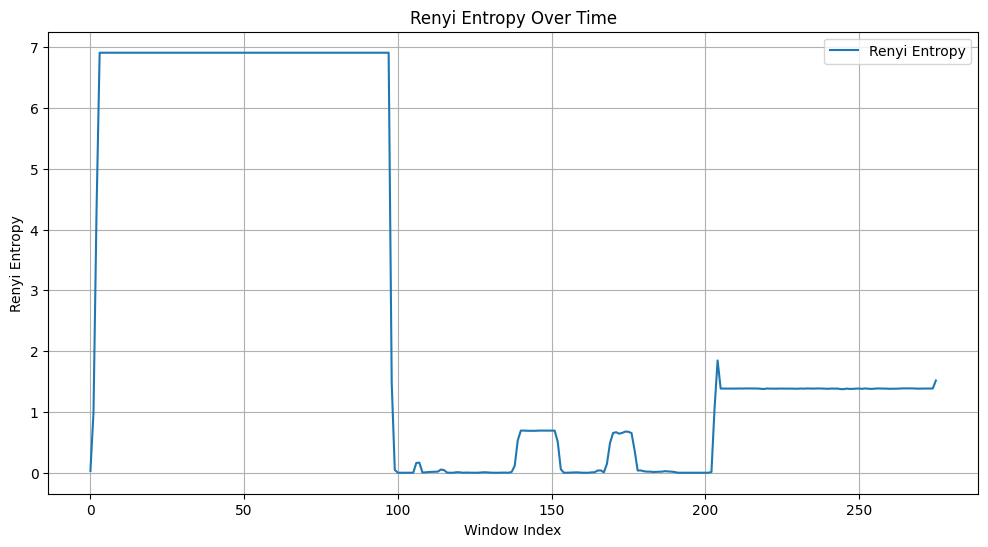

In [10]:
# Plot entropy values
plt.figure(figsize=(12, 6))
plt.plot(renyi_entropy_values, label="Renyi Entropy")
plt.title("Renyi Entropy Over Time")
plt.xlabel("Window Index")
plt.ylabel("Renyi Entropy")
plt.grid(True)
plt.legend()
plt.show()



In [19]:
for i, (ent, label) in enumerate(zip(renyi_entropy_values, binary_labels)):
    print(f"Index: {i}, Entropy: {ent:.4f}, Label: {label}")


Index: 0, Entropy: 0.0300, Label: normal
Index: 1, Entropy: 0.9941, Label: normal
Index: 2, Entropy: 4.3436, Label: ddos
Index: 3, Entropy: 6.9078, Label: ddos
Index: 4, Entropy: 6.9078, Label: ddos
Index: 5, Entropy: 6.9078, Label: ddos
Index: 6, Entropy: 6.9078, Label: ddos
Index: 7, Entropy: 6.9078, Label: ddos
Index: 8, Entropy: 6.9078, Label: ddos
Index: 9, Entropy: 6.9078, Label: ddos
Index: 10, Entropy: 6.9078, Label: ddos
Index: 11, Entropy: 6.9078, Label: ddos
Index: 12, Entropy: 6.9078, Label: ddos
Index: 13, Entropy: 6.9078, Label: ddos
Index: 14, Entropy: 6.9078, Label: ddos
Index: 15, Entropy: 6.9078, Label: ddos
Index: 16, Entropy: 6.9078, Label: ddos
Index: 17, Entropy: 6.9078, Label: ddos
Index: 18, Entropy: 6.9078, Label: ddos
Index: 19, Entropy: 6.9078, Label: ddos
Index: 20, Entropy: 6.9078, Label: ddos
Index: 21, Entropy: 6.9078, Label: ddos
Index: 22, Entropy: 6.9078, Label: ddos
Index: 23, Entropy: 6.9078, Label: ddos
Index: 24, Entropy: 6.9078, Label: ddos
Index:

In [20]:
# Thresholding for DDoS detection only
threshold = 5.0  # manually chosen threshold between normal and DDoS entropy
predicted_attacks = ["ddos" if ent >= threshold else "normal" for ent in renyi_entropy_values]

# Convert true labels to binary (ddos vs normal)
binary_labels = ["ddos" if str(lbl).strip().lower() == "ddos" else "normal" for lbl in labels]

# Evaluate prediction
print(classification_report(binary_labels, predicted_attacks))


              precision    recall  f1-score   support

        ddos       1.00      0.98      0.99        97
      normal       0.99      1.00      0.99       179

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



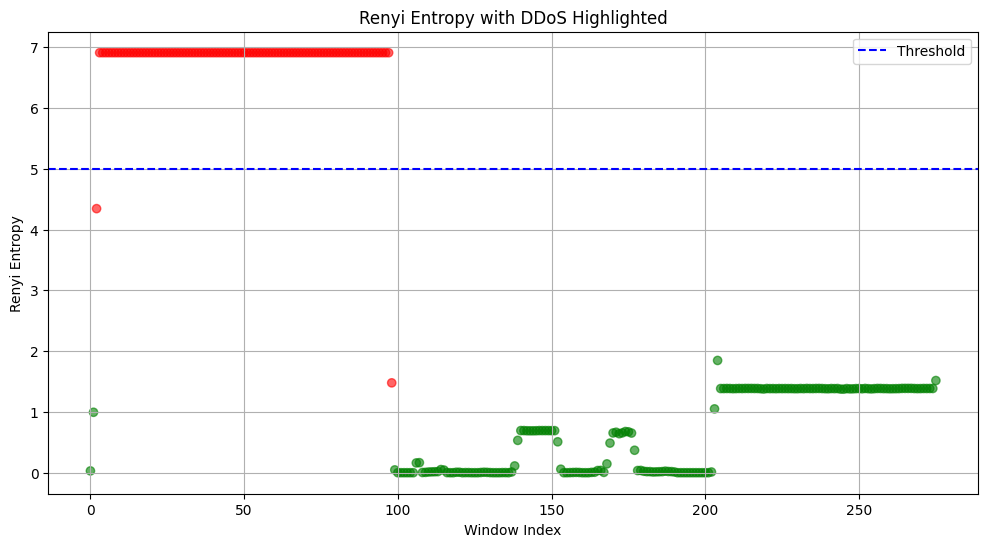

In [21]:
colors = ['red' if lbl == 'ddos' else 'green' for lbl in binary_labels]
plt.figure(figsize=(12, 6))
plt.scatter(range(len(renyi_entropy_values)), renyi_entropy_values, c=colors, alpha=0.6)
plt.axhline(y=threshold, color='blue', linestyle='--', label='Threshold')
plt.title('Renyi Entropy with DDoS Highlighted')
plt.xlabel('Window Index')
plt.ylabel('Renyi Entropy')
plt.legend()
plt.grid(True)
plt.show()
